In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
df = pd.read_csv("/Users/youngsam/Code/SULI/GitHub/grb/2D_correlation/151027A/151027A_converted_flux_accepted_ext_corr.txt",header=None,names=["time_sec", "flux", "flux_err", "band", "source"], sep="\t")
df.head(10)

,time_sec,flux,flux_err,band,source
0,24.0,5.641053e-11,1.045224e-11,R,nissim
1,79.2,4.779622e-11,8.853602e-12,R,nissim
2,126.0,6.537105e-11,1.211197e-11,R,nissim
3,171.6,4.086709e-11,7.570619e-12,R,nissim
4,217.2,5.641053e-11,1.045224e-11,R,nissim
5,264.0,5.798880e-11,1.074244e-11,R,nissim
6,307.0,9.300833e-11,4.283417e-12,u,manual
7,1366.0,2.395411e-11,4.437493e-12,R,nissim
8,1468.0,1.902583e-11,3.524640e-12,R,nissim
9,1501.0,3.071523e-11,5.691965e-12,R,nissim


In [3]:
bands = np.unique(df["band"])

In [9]:

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Courier']


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Courier


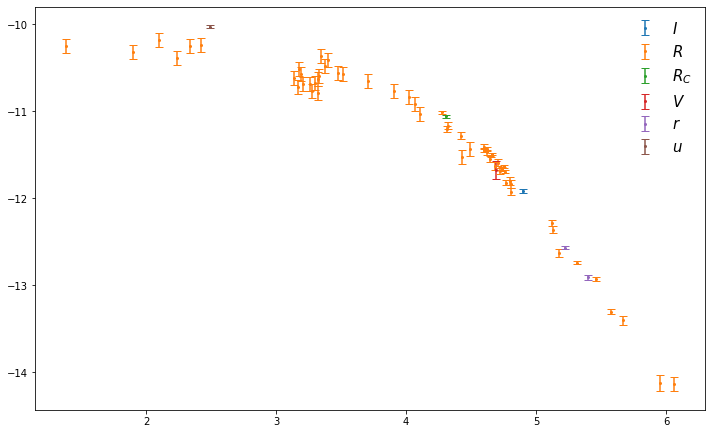

In [16]:
plt.figure(figsize=(12,7.416407865))
for band in bands:
    bandmask = df["band"] == band
    T = df[bandmask]["time_sec"]
    F = df[bandmask]["flux"]
    F_err = df[bandmask]["flux_err"]
    
    logT = T.apply(np.log10).to_list()
    logF = F.apply(np.log10).to_list()
    logFerr = F_err / (np.log(10) * F)
    
    if band == "Rc":
        band = "R_{C}"
        
    plt.errorbar(logT, logF, yerr=logFerr, ls= '', marker=".", ms=4, capsize=4, label=f"${band}$")
    
plt.legend(framealpha=0., fontsize=15)
plt.show()

In [44]:
bands

array(['I', 'R', 'Rc', 'V', 'r', 'u'], dtype=object)